# Section 1

In [7]:
import base64
import string
import numpy as np

alphabet = string.ascii_lowercase
english_probs = {"a":8.55,"b":1.6,"c":3.16,"d":3.87,"e":12.1,"f":2.18,"g":2.09,"h":4.96,"i":7.33,"j":0.22,"k":0.81,"l":4.21,"m":2.53,"n":7.17,"o":7.47,"p":2.07,"q":0.1,"r":6.33,"s":6.73,"t":8.94,"u":2.68,"v":1.06,"w":1.86,"x":0.19,"y":1.72,"z":0.11}
base64_ciphertext = "KxRIRjMSEgMUFQkIRhIOA0YKBxEfAxRGEQcVRgdGCwcIRgkARgdGFBMBAQMCRgUJEwgSAwgHCAUDRhIOBxJGEQcVRggDEAMURgoPAQ4SAwJGBB9GB0YVCw8KA11GBQkKAkpGFQUHCBIfRgcIAkYDCwQHFBQHFRUDAkYPCEYCDxUFCRMUFQNdRgQHBQ0RBxQCRg8IRhUDCBIPCwMIEl1GCgMHCEpGCgkIAUpGAhMVEh9KRgIUAwcUH0YHCAJGHwMSRhUJCwMOCRFGCgkQBwQKA0g="

'''
    Gets the probs of each english letter on each "plain text"
'''
def get_text_probs(value):
    result = {}
    l = len(value.lower().strip())
    for i in alphabet:
      if i in value:
        result[i] = value.count(i)/l 
      else:
        result[i] = 0
    return result
    
'''
    Statistical distance formula
    sd = 1/2 * sum(|pr(x) - pr(y)|)
'''
def statistical_distance(text_prob):
    result = 0.0
    for i in alphabet:
      result += abs(english_probs[i]-text_prob[i])
    return 1/2*result

'''
    XOR function
'''
def to_bytes(var, key):
    a = np.frombuffer(var, dtype = np.uint8)
    b = np.frombuffer(key, dtype = np.uint8)
    return (a^b).tobytes()

'''
    Get the stadistical distance and text of each number 
    from 0 to 255 into a dictionary
'''    
def keys_distance(ct):
  distances = {}
  for i in range(0,256):
    xorted_ct = to_bytes(ct, i.to_bytes(1, 'little'))
    plaintext = xorted_ct.decode('UTF-8', errors='ignore')
    text_prob = get_text_probs(plaintext)
    distances[i] = [statistical_distance(text_prob), plaintext]
  return distances

'''
    Gets the miniumun stadistical distance of all previously calculated
'''    
def min_distance(keys_distances):
  return min(keys_distances, key=keys_distances.get)

def show_result_1():
  ct_decoded = base64.b64decode(base64_ciphertext)
  kd = keys_distance(ct_decoded)
  key = min_distance(kd)
  print("The recovered plaintext: ", kd[key][1])
  print("The decryption key: ", key)

show_result_1()


The recovered plaintext:  Mr. Utterson the lawyer was a man of a rugged countenance that was never lighted by a smile; cold, scanty and embarrassed in discourse; backward in sentiment; lean, long, dusty, dreary and yet somehow lovable.
The decryption key:  102


# Section 2

Possible Top 3 Key Lengths: [14, 21, 13]


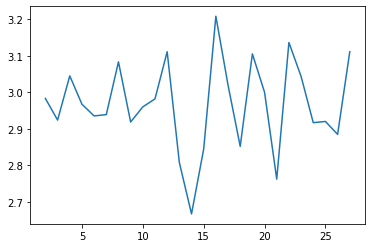

In [15]:
import base64
from heapq import nsmallest
import matplotlib.pyplot as plt

ciphertext_2 = "EjxYTxMKdwYaSBwcGTwfCBxHOwsGLRYdGwsBZSw8GhsaCncIEwdDVQM6AQ1OEzwJEWwJFRoBUjIgIFQOFRg+B1QLHRoEJRoHCUchGEUlC1QzBBY2IypTHFIUPgcQRE8XBjoGDgYTdAcQOEUVVAMeKi43VAAUWTsIGgwDGgYxAEkZDiAARToEFxULBmUtPAAcXlk2BRhIAxobPhoHCUcyBxc7BAYQRQYqYTcdHAIWJAAaD08aEnUSSQoSORhFOwoGAA1SMTY8VAsdFTsIBhtPFBoxUwhODzUEA2BFEhsXUiMoNQAWUg0/BgEbDhsQe1MnARB0CQtsBB0GFR03NXMZGgENdwYXCxoFDXUSSRgGJxxFIAoAVAoUZS0yGgteWSQGVAsOGxo6B0kdEzUGAWwXHRMNBmUoPVQOUjo+HQ1PHFUHPRwZHg46D0UoDAcAFxsmNWhUDQcNdw8dBg4ZGCxTCE4FPQ9FOBcVFxFSMiAgVA0dDDABAERPFBoxUxsHADwcRSULVBYEES5hPBJPBhA5EFQlDgcdNB1OHUc2CQYnRQ0VFxZkYRoaHAYYOR0YEUNVNzwHEE4vNQQJbBIVB0UUMC0/VAAUWTYZBAQGFhU7BxpOATsaRSoJDR0LFWUDIRUBBhY5STwBAxkHclMPBxUnHEUtDAYXFxMjNX1UOx1ZEAgQGw0MUyZTAwEeeEgEIQoaExYGZTU7FRtSGyIHFwBPAhUmUyEPFTsEAWwxHBsIAjYuPVhPExd3BhgMTzoGMhIHBx01HAwjC1QYBBZpYSQcAFIONhpUAwEaAztTCBwIIQYBbBEbAwtSJDJzFU8RETYZVB8HGlQ2HBwCA3QMCmwEFhsQBmUgPQ0bGhA5DlQLDhkYPB0OTgE7GkUuFxUdCwFrYRIHTxMXdwgdGh8aBiFTAB1HOgcRbAkVHQFSKjQnVAYcWTZJEAkWWVQdEhsBCzBIAiMRVBYQATxhJB0bGlknCB0MTxQCPBIdARUnSAQiAVQHCh0rYSQVHFIJPgUbHAYbE3USSQ0VNQ4RbBIdAA0dMDVzFQYWQncIGgxPGxshUwYACy1IJz4EGgAKHGUJOhgDAVkxBhgDHFlUNwYdTgg4DEUtEx0VER03Mn9UHBMOdwAaSCcUBjofDUJHNUhHLgwGEEgfJC9xVAAUWTkGVBsCFBg5UwgMDjgBETVLVDULFmUyPFQbGxcuSTkJHRwVO1QaTkUiARYlChpWRQUkMnMVTxQYNB1PSAUAByFTCB1HdgoMK0UTHRceZ2EfAQwLXiRJLgcATlQ0HQ1CRzUbRTsMABxFEyktcxYGFVkUAAARTxQSMxIAHBR4SAQiRT0aBAciNCEVGxsWOUkHAAAAGDFTGhoGJhxFJRFUGwMUa2EdGxheWTgHVAkDGVQmBgoGRzUOAy0MBgdFCyo0cxUDBRguGlQOBhsQdRJJTBE9Gww4CgZUChRlKTwaAABbbEkVBgtVGztTHQYOJ0gCPgQaEEUWJDhzMw4WCjUQVAsAABgxHU4aRyAADCIOVBsDUiQvKhYAFgB3DxsaTwEcNAdJBwokBxc4BBoARQIqMidUDQcNdyQVGgYUGntTKAADeEgEP0UdAEUFKjQ/EE8dGjQcBkgGG1QUBg4bFCBERS0LDVQBEzxhJBsaHh13DRtETxQHdQcBDxN0ARZsBFQHBhoqLj9UGRMaNh0dBwFVGTodHQZJ"


"""
    2.a
"""
def split_text(text, n):
  return [text[i:i + n] for i in range(0, len(text), n)]

def split_bytes(data, n):
  ct_decoded = base64.b64decode(data)
  chunks = split_text(ct_decoded, n)
  if len(chunks[0]) != len(chunks[-1]):
    chunks.pop()
  return chunks

"""
    2.b
"""
def hamming_distance(a, b):
  hd = 0
  for b1,b2 in zip(a,b):
    hd += bin(b1^b2).count('1')
  return hd


"""
    2.c
"""
def most_likely_key_length(text):
  hd_scores_map = {}
  for keySize in range (2,51):
    distances = []
    chunks = split_bytes(text,keySize)
    for a in chunks:
      for b in chunks:
        hd_normalized = hamming_distance(a,b) / keySize
        if hd_normalized > 0:
          distances.append(hd_normalized)
    if len(distances) > 0:
      score = sum(distances) / len(distances)
      hd_scores_map[keySize] = score
  return hd_scores_map

def most_top_n(scores_map, n):
  return nsmallest(n, scores_map, key=scores_map.get)

def show_result_2(text, top_n):
  scores_map = most_likely_key_length(text)
  possible_keys_length = most_top_n(scores_map, top_n)
  print(f'Possible Top 3 Key Lengths: {possible_keys_length}')
  #[print(f'Key: {k} - Score: {s}') for k,s in possible_keys_length.items()]
  plt.plot(*zip(*scores_map.items()))
  plt.show()

"""
  Testing values:

  Test #1
  p = alvaro is mad at me
  k = tim
  c = FQUbFRsCVAAeVAQMEEkMAEkAEQ==
  result = [3, 6, 2]

  Test #2
  p = juan jose araya castro tony venegas and alvaro are trying to solver exercise two point d
  k = cryptography is simple
  c = CQcYHlQFCAEEUAkLQRASABAIHgQeCkMGFh4NTxEXDxUPGFNJEk4XSQwcGgQRHVkRBgpHBhMJARdHSQdPUxoCHBoAEVIcCBEdBBsSFUgNVwZTUBwAAwRMAQ==
  result = [22, 39, 24]

  Test #3
  p = We spent like 16 hours maybe more solving the point 2.c
  k = tony is eating
  c = IwpOClAMHVRFDR0CC0dFWU4RTxwBU0UMFRAMAlQCAQtFSQBPCRcdBwlHAAcLWVAGGk4RQUZHDQ==
  result = [14, 21, 13]

"""


show_result_2(ciphertext_2, top_n=3)





# Section 3